In [1]:
import os

import tensorflow as tf
import tensorflow_io as tfio

In [2]:
audio = tfio.audio.AudioIOTensor('./dummy_data/hobby_00000982.wav')
print(audio)

<AudioIOTensor: shape=[73600     1], dtype=<dtype: 'int16'>, rate=16000>


In [3]:
audio_slice = audio.to_tensor()
audio_tensor = tf.squeeze(audio_slice, axis=[-1])
print(audio_tensor)

tf.Tensor([ 0  0  0 ... 11  9  2], shape=(73600,), dtype=int16)


In [4]:
from IPython.display import Audio

Audio(audio_tensor.numpy(), rate=audio.rate.numpy())

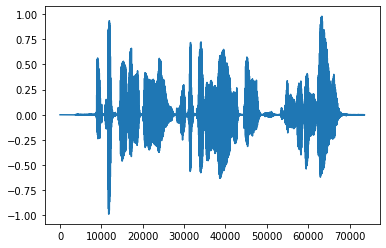

In [5]:
import matplotlib.pyplot as plt

tensor = tf.cast(audio_tensor, dtype=tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())

# Trim the noise

tf.Tensor([ 8859 67106], shape=(2,), dtype=int64)
tf.Tensor(8859, shape=(), dtype=int64) tf.Tensor(67106, shape=(), dtype=int64)


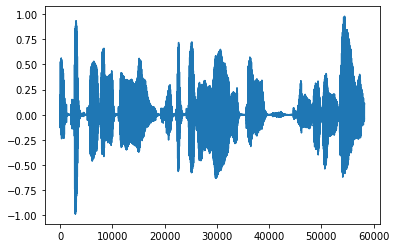

In [6]:
position = tfio.audio.trim(tensor, axis=0, epsilon=0.1)
print(position)

start = position[0]
stop = position[1]
print(start, stop)

processed = tensor[start:stop]

plt.figure()
plt.plot(processed.numpy())

# Fade In and Fade Out

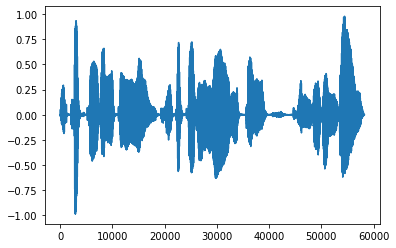

In [7]:
fade = tfio.audio.fade(processed, fade_in=1000, fade_out=2000, mode='logarithmic')

plt.figure()
plt.plot(fade.numpy())

# Spectrogram

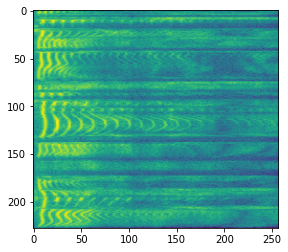

In [8]:
spectrogram = tfio.audio.spectrogram(fade, nfft=512, window=512, stride=256)

plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

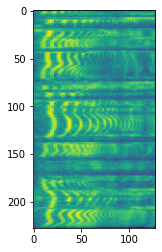

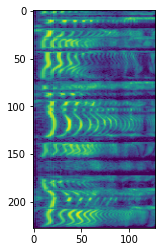

In [9]:
# Convert to mel-spectrogram
mel_spectrogram = tfio.audio.melscale(spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)

plt.figure()
plt.imshow(tf.math.log(mel_spectrogram).numpy())

# Convert to db scale mel-spectrogram
dbscale_mel_spectrogram = tfio.audio.dbscale(mel_spectrogram, top_db=80)

plt.figure()
plt.imshow(dbscale_mel_spectrogram.numpy())

# SpecAugment

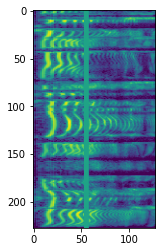

In [10]:
# Freq masking
freq_mask = tfio.audio.freq_mask(dbscale_mel_spectrogram, param=10)

plt.figure()
plt.imshow(freq_mask.numpy())

# Time Masking

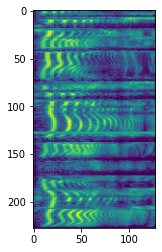

In [11]:
# Time masking
time_mask = tfio.audio.time_mask(dbscale_mel_spectrogram, param=10)

plt.figure()
plt.imshow(time_mask.numpy())